<a href="https://colab.research.google.com/github/adityamavle/LLMs_Ligand_Binding/blob/master/UniProt_Function_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtain the mapping of PDB_ID to UniProt ID and populate the 54K Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Combined_Data_With_3DI_54K.csv')

In [ ]:
data.head()

,Unnamed: 0,Pocket Description,Extracted Positions,Amino Acid,Ligand Name,SMILES,Ground Truth,PDB_ID,Chain_ID,3DI Sequence
0,0,2Y2BA01.pkt,"['18', '19', '20', '34', '35', '36', '51', '52...",HYDHNILFLRVSARAWHAGVSNGEHARKD,MHI,C[C@@H](C(=O)N[C@H](CCC(=O)N[C@@H](CCC[C@H](C(...,Yes,2Y2B,A,CRYSTAL STRUCTURE OF AMPD IN COMPLEX WITH REAC...
1,1,2Y24A05.pkt,"['327', '328', '329', '330', '371', '373', '374']",SDQMWNP,PG4,C(COCCOCCOCCO)O,Yes,2Y24,A,STRUCTURAL BASIS FOR SUBSTRATE RECOGNITION BY ...
2,2,2Y24A04.pkt,"['233', '234', '235', '236', '237', '238', '23...",NNWTSAIETDSASLS,PG4,C(COCCOCCOCCO)O,Yes,2Y24,A,STRUCTURAL BASIS FOR SUBSTRATE RECOGNITION BY ...
3,3,2Y24A06.pkt,"['107', '108', '110', '111', '112', '113', '11...",SATSHLLDFSKQSKFG,PGE,C1C(O1)COC2=CC=CC=C2,Yes,2Y24,A,STRUCTURAL BASIS FOR SUBSTRATE RECOGNITION BY ...
4,4,1Y2UA01.pkt,"['26', '27', '28', '29', '30', '45', '46', '47...",KYANGGGSGTN,GAL,C([C@@H]1[C@@H]([C@@H]([C@H](C(O1)O)O)O)O)O,Yes,1Y2U,A,CRYSTAL STRUCTURE OF THE COMMON EDIBLE MUSHROO...


In [ ]:
def write_pdb_ids(data, filename):
    if 'PDB_ID' not in data.columns:
        return
    with open(filename, 'w') as file:
        for pdb_id in data['PDB_ID'].dropna().unique():
            file.write(f"{pdb_id}\n")

write_pdb_ids(data,'pdbs.txt')

After obtaining the list of pdb ids in a text file, I logged on to https://www.uniprot.org/id-mapping and loaded the PDB ID text file. I set the mapping parameters as given in the image.

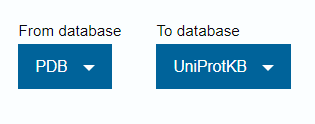

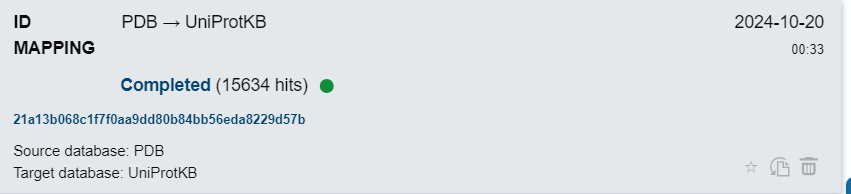

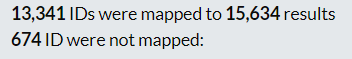

In [ ]:
print("The number of unique PDB_ID are:",len(data['PDB_ID'].unique()))

The number of unique PDB_ID are: 14015


I then exported it as a xlsx. I noticed that despite there being 14015 unique PDB_IDs out of which 13,341 IDs were mapped to 15634 results, suggesting that some PDB_IDs had one to many mapping in the UniProtKB Database.

In [ ]:
uni_prot_mapped = pd.read_excel('/content/idmapping_2024_10_20.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
len(uni_prot_mapped)

15634

In [ ]:
uni_prot_mapped.head()

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
0,2Y2B,P82974,reviewed,AMPD_CITFR,"1,6-anhydro-N-acetylmuramyl-L-alanine amidase ...",ampD,Citrobacter freundii,187
1,2Y24,Q46961,unreviewed,Q46961_DICCH,Xylanase,NaN,Dickeya chrysanthemi (Pectobacterium chrysanth...,413
2,1Y2U,Q00022,reviewed,ABL_AGABI,Agaricus bisporus lectin (ABL) (Agaricus bispo...,NaN,Agaricus bisporus (White button mushroom),143
3,2Y2F,O68720,unreviewed,O68720_YERPE,protein-tyrosine-phosphatase (EC 3.1.3.48),yopH Y0013 YPCD1.67c,Yersinia pestis,468
4,1Y2F,P77173,reviewed,ZIPA_ECOLI,Cell division protein ZipA (FtsZ interacting p...,zipA b2412 JW2404,Escherichia coli (strain K12),328


In [ ]:
mapping_counts = uni_prot_mapped.groupby('From')['Entry'].nunique()
multiple_mappings = mapping_counts[mapping_counts > 1]
print(mapping_counts.head())

From
11AS    1
13PK    1
1A0I    1
1A0J    1
1A0T    1
Name: Entry, dtype: int64


In [ ]:
print(multiple_mappings)

From
1A3L    2
1A6E    2
1AGR    2
1AR1    4
1AXS    2
       ..
4YDU    2
4YFX    5
5AFT    4
5AJO    2
7REQ    2
Name: Entry, Length: 1429, dtype: int64


In [ ]:
one_to_many_from = mapping_counts[mapping_counts > 1].index

# Filter the original DataFrame to keep only rows where 'From' is in the list of One-to-Many mappings
one_to_many_df = uni_prot_mapped[uni_prot_mapped['From'].isin(one_to_many_from)]
one_to_many_df.head()

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
15,3V6E,O75604,reviewed,UBP2_HUMAN,Ubiquitin carboxyl-terminal hydrolase 2 (EC 3....,USP2 UBP41,Homo sapiens (Human),605
16,3V6E,P0CG48,reviewed,UBC_HUMAN,Polyubiquitin-C [Cleaved into: Ubiquitin],UBC,Homo sapiens (Human),685
18,3V6C,O75604,reviewed,UBP2_HUMAN,Ubiquitin carboxyl-terminal hydrolase 2 (EC 3....,USP2 UBP41,Homo sapiens (Human),605
19,3V6C,P0CG48,reviewed,UBC_HUMAN,Polyubiquitin-C [Cleaved into: Ubiquitin],UBC,Homo sapiens (Human),685
21,3PCQ,P0A401,reviewed,PSAF_THEVB,Photosystem I reaction center subunit III (PSI-F),psaF tlr2411,Thermosynechococcus vestitus (strain NIES-2133...,164


In [ ]:
reviewed_one_many = one_to_many_df[one_to_many_df['Reviewed'] == 'reviewed']
len(reviewed_one_many)

3236

This means that around 1429 PDB IDs have multiple values in UniProtKB, which ones to pick for Functional Description Extraction?


In [ ]:
uni_prot_mapped['Reviewed'].value_counts()

,count
Reviewed,
reviewed,11063
unreviewed,4571


Let's check how many multiple mapped UniProt IDs have the value as reviewed

In [ ]:
reviewed_status = uni_prot_mapped.groupby(['From', 'Entry'])['Reviewed'].unique()
reviewed_status_df = reviewed_status.reset_index()
reviewed_status_df['Is_Reviewed'] = reviewed_status_df['Reviewed'].apply(lambda x: 'reviewed' in x and len(x) == 1)

In [ ]:
reviewed_df = uni_prot_mapped[uni_prot_mapped['Reviewed'] == 'reviewed']

In [ ]:
len(reviewed_df)

11063

In [ ]:
reviewed_counts = reviewed_df.groupby('From')['Entry'].nunique()
multiple_reviewed = reviewed_counts[reviewed_counts > 1].index
mul_mappings_reviewed_df = reviewed_df[reviewed_df['From'].isin(multiple_reviewed)]

In [ ]:
mul_mappings_reviewed_df

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
15,3V6E,O75604,reviewed,UBP2_HUMAN,Ubiquitin carboxyl-terminal hydrolase 2 (EC 3....,USP2 UBP41,Homo sapiens (Human),605
16,3V6E,P0CG48,reviewed,UBC_HUMAN,Polyubiquitin-C [Cleaved into: Ubiquitin],UBC,Homo sapiens (Human),685
18,3V6C,O75604,reviewed,UBP2_HUMAN,Ubiquitin carboxyl-terminal hydrolase 2 (EC 3....,USP2 UBP41,Homo sapiens (Human),605
19,3V6C,P0CG48,reviewed,UBC_HUMAN,Polyubiquitin-C [Cleaved into: Ubiquitin],UBC,Homo sapiens (Human),685
21,3PCQ,P0A401,reviewed,PSAF_THEVB,Photosystem I reaction center subunit III (PSI-F),psaF tlr2411,Thermosynechococcus vestitus (strain NIES-2133...,164
...,...,...,...,...,...,...,...,...
15615,4XLW,D3ZHH1,reviewed,DLL4_RAT,Delta-like protein 4 (Drosophila Delta homolog...,Dll4,Rattus norvegicus (Rat),686
15616,4XLW,Q07008,reviewed,NOTC1_RAT,Neurogenic locus notch homolog protein 1 (Notc...,Notch1,Rattus norvegicus (Rat),2531
15623,1XLS,O35627,reviewed,NR1I3_MOUSE,Nuclear receptor subfamily 1 group I member 3 ...,Nr1i3 Car,Mus musculus (Mouse),358
15624,1XLS,Q9WUI9,reviewed,NCOA2_RAT,Nuclear receptor coactivator 2 (NCoA-2) (Trans...,Ncoa2 Tif2,Rattus norvegicus (Rat),1465


In [ ]:
mul_mappings_reviewed_df.to_csv('mul_mappings_reviewed_df.csv')

**UniProt ID Choice for the PDBs with duplicate UniProt IDs associated with it** Since we have one to many from to entry mappings. We'll pick the 1st mapped instance that has the column called ['Reviewed']'s value as reviewed. This is with the understanding that having a column value as reviewed makes a good difference.

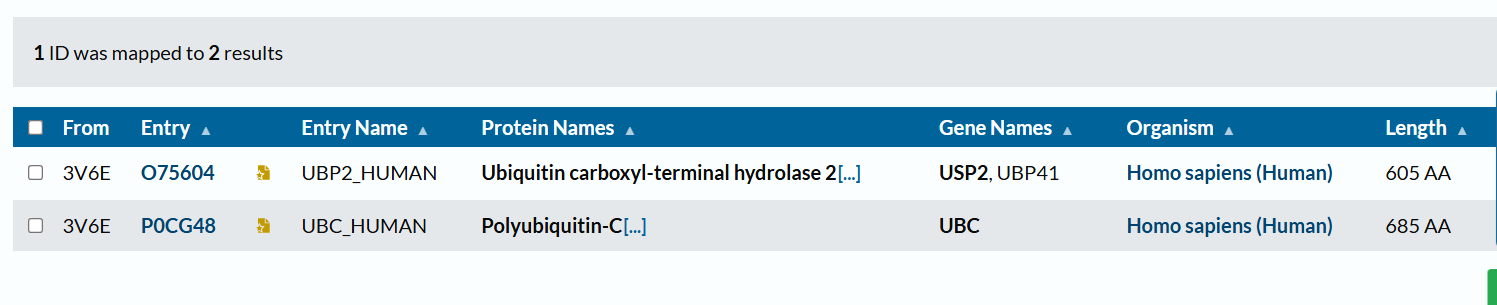

On visual verification it appears that the first instance of the PDB_ID to UniProt Mapping has the accurate entry when comparing the protein names on RCSB and UniProt. In most cases though, even with multiple mappings, the UniPROT entry is referring to the same protein entry. Just the Functional description would vary a bit

Therefore just deciding to drop duplicate entries of PDB_IDs in the mapping set and keep the first entry. I also could've filtered for the reviewed parameter but figured that would drastically reduce the dataset size

In [ ]:
uni_prot_mapped['Reviewed'].value_counts()

,count
Reviewed,
reviewed,11063
unreviewed,4571


In [ ]:
uni_prot_unique = uni_prot_mapped.drop_duplicates(subset = 'From', keep = 'first')

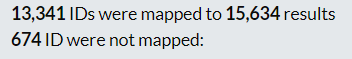

Alternativaly lets refine the query so that it selects the first instance of a PDB_ID where the Reviewed column has the value "reviewed", but falls back to the first available instance if no such "reviewed" instance exists. With the implicit understadning that reviewed columns are better

In [ ]:
uni_prot_unique.to_csv('PDB_UniProt_Mapping.csv')

In [ ]:
def select_first_reviewed_or_fallback(group):
    reviewed_rows = group[group['Reviewed'] == 'reviewed']
    if not reviewed_rows.empty:
        return reviewed_rows.iloc[0]
    else:
        return group.iloc[0]

uni_prot_unique_reviewed = uni_prot_mapped.groupby('From', group_keys=False).apply(select_first_reviewed_or_fallback)
print(uni_prot_unique_reviewed.head())


      From   Entry  Reviewed  Entry Name  \
From                                       
11AS  11AS  P00963  reviewed  ASNA_ECOLI   
13PK  13PK  P07378  reviewed  PGKC_TRYBB   
1A0I  1A0I  P00969  reviewed   DNLI_BPT7   
1A0J  1A0J  P35033  reviewed  TRY3_SALSA   
1A0T  1A0T  P22340  reviewed  SCRY_SALTM   

                                          Protein names         Gene Names  \
From                                                                         
11AS  Aspartate--ammonia ligase (EC 6.3.1.1) (Aspara...  asnA b3744 JW3722   
13PK  Phosphoglycerate kinase, glycosomal (Phosphogl...                NaN   
1A0I  DNA ligase (EC 6.5.1.1) (DNA ligase gp1.3) (Ge...                1.3   
1A0J              Trypsin-3 (EC 3.4.21.4) (Trypsin III)                NaN   
1A0T                                      Sucrose porin               scrY   

                                     Organism  Length  
From                                                   
11AS            Escherichia coli

<ipython-input-29-0db7df087ed7>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  uni_prot_unique_reviewed = uni_prot_mapped.groupby('From', group_keys=False).apply(select_first_reviewed_or_fallback)


In [ ]:
len(uni_prot_unique_reviewed)

13341

In [ ]:
uni_prot_unique_reviewed = uni_prot_unique_reviewed.reset_index(drop=True)

In [ ]:
uni_prot_unique_reviewed

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
0,11AS,P00963,reviewed,ASNA_ECOLI,Aspartate--ammonia ligase (EC 6.3.1.1) (Aspara...,asnA b3744 JW3722,Escherichia coli (strain K12),330
1,13PK,P07378,reviewed,PGKC_TRYBB,"Phosphoglycerate kinase, glycosomal (Phosphogl...",NaN,Trypanosoma brucei brucei,440
2,1A0I,P00969,reviewed,DNLI_BPT7,DNA ligase (EC 6.5.1.1) (DNA ligase gp1.3) (Ge...,1.3,Escherichia phage T7 (Bacteriophage T7),359
3,1A0J,P35033,reviewed,TRY3_SALSA,Trypsin-3 (EC 3.4.21.4) (Trypsin III),NaN,Salmo salar (Atlantic salmon),238
4,1A0T,P22340,reviewed,SCRY_SALTM,Sucrose porin,scrY,Salmonella typhimurium,505
...,...,...,...,...,...,...,...,...
13336,5LDH,P00336,reviewed,LDHB_PIG,L-lactate dehydrogenase B chain (LDH-B) (EC 1....,LDHB,Sus scrofa (Pig),334
13337,5PNT,P24666,reviewed,PPAC_HUMAN,Low molecular weight phosphotyrosine protein p...,ACP1,Homo sapiens (Human),158
13338,7ODC,P00860,reviewed,DCOR_MOUSE,Ornithine decarboxylase (ODC) (EC 4.1.1.17),Odc1 Odc,Mus musculus (Mouse),461
13339,7REQ,P11652,reviewed,MUTA_PROFR,Methylmalonyl-CoA mutase small subunit (EC 5.4...,mutA,Propionibacterium freudenreichii subsp. shermanii,638


In [ ]:
uni_prot_unique_reviewed.to_csv('PDB_UniProt_Unique.csv')

Using this to generate the Function parameter from UniProt

# Extraction of Function from UniProt Website

Task to Do

1. Based on the UniProt IDs in the CSV. Extract the Function description from the UniProt Website.
2. Add it to the CSV of mapping. And then add it to OG csv
3.

URL Example: https://www.uniprot.org/uniprotkb/P00963/entry
URL Format: https://www.uniprot.org/uniprotkb/df['Entry'][i]/entry

In [ ]:
df = df.rename(columns = {'From':'PDB_ID', 'Entry': 'UniProt_ID'})

In [ ]:
df =  pd.read_csv('/content/PDB_UniProt_Unique.csv')

In [ ]:
df.head()

,Unnamed: 0,PDB_ID,UniProt_ID,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
0,0,11AS,P00963,reviewed,ASNA_ECOLI,Aspartate--ammonia ligase (EC 6.3.1.1) (Aspara...,asnA b3744 JW3722,Escherichia coli (strain K12),330
1,1,13PK,P07378,reviewed,PGKC_TRYBB,"Phosphoglycerate kinase, glycosomal (Phosphogl...",NaN,Trypanosoma brucei brucei,440
2,2,1A0I,P00969,reviewed,DNLI_BPT7,DNA ligase (EC 6.5.1.1) (DNA ligase gp1.3) (Ge...,1.3,Escherichia phage T7 (Bacteriophage T7),359
3,3,1A0J,P35033,reviewed,TRY3_SALSA,Trypsin-3 (EC 3.4.21.4) (Trypsin III),NaN,Salmo salar (Atlantic salmon),238
4,4,1A0T,P22340,reviewed,SCRY_SALTM,Sucrose porin,scrY,Salmonella typhimurium,505


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
def scrape_function(uniprot_id):

  url = f"https://www.uniprot.org/uniprotkb/{uniprot_id}/entry"
  response = requests.get(url)

  if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    function_section = soup.find('div', {'id': 'function'})


    if function_section:
        # Extract the function text
        function_text = function_section.get_text(strip=True)
        return function_text
    else:
        return "Function section not found"
  else:
      return "Failed to retrieve the page"


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

df = pd.DataFrame({
    'UniProt_ID': ['P00963', 'Q9Y3I0', 'P12345'],
    'Function': [None, None, None]
})

# Function to scrape the "Function" field from a UniProt URL
def scrape_function(uniprot_id):
    url = f"https://www.uniprot.org/uniprot/{uniprot_id}"  # URL format for UniProt
    response = requests.get(url)

    # Check if the page was retrieved successfully
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the "Function" section using its id and class
        function_section = soup.find('section', {'id': 'function', 'class': 'card'})

        if function_section:
            # Extract the function text inside the 'text-block' div
            function_text_div = function_section.find('div', {'class': 'text-block'})
            if function_text_div:
                function_text = function_text_div.get_text(strip=True)
                return function_text
            else:
                return "Function text not found"
        else:
            return "Function section not found"
    else:
        return "Failed to retrieve the page"

# Iterate through the DataFrame and scrape the "Function" for each UniProt ID



In [ ]:
for index, row in df.iterrows():
    uniprot_id = row['UniProt_ID']
    function_text = scrape_function(uniprot_id)
    df.at[index, 'Function'] = function_text
df.head()

KeyboardInterrupt: 

In [ ]:
import requests

# Function to retrieve the "FUNCTION" comment from the JSON of a given UniProt ID
def get_function_comment(uniprot_id):
    # Construct the URL
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"

    # Make a GET request to the UniProt API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Look for the "comments" section
        if 'comments' in data:
            for comment in data['comments']:
                # Check if the commentType is "FUNCTION"
                if comment.get('commentType') == 'FUNCTION':
                    # Look for the "value" field under "texts"
                    for text in comment.get('texts', []):
                        # Return the "value" of the FUNCTION comment
                        return text.get('value')

        return "FUNCTION comment not found"
    else:
        return f"Failed to retrieve data for {uniprot_id}. HTTP Status: {response.status_code}"

# Example usage
uniprot_id = "P00963"  # Example UniProt ID
function_comment = get_function_comment(uniprot_id)
print(f"Function for {uniprot_id}: {function_comment}")


Function for P00963: May amidate Asp of the extracellular death factor precursor Asn-Asn-Trp-Asp-Asn to generate Asn-Asn-Trp-Asn-Asn


In [ ]:
def get_function_comment(uniprot_id):
    # Construct the URL
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"

    # Make a GET request to the UniProt API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Initialize variables to store potential function text
        function_comment = None
        miscellaneous_comment = None

        # Look for the "comments" section
        if 'comments' in data:
            for comment in data['comments']:
                # Check if the commentType is "FUNCTION"
                if comment.get('commentType') == 'FUNCTION':
                    for text in comment.get('texts', []):
                        function_comment = text.get('value')

                # Check if the commentType is "MISCELLANEOUS"
                elif comment.get('commentType') == 'MISCELLANEOUS':
                    for text in comment.get('texts', []):
                        miscellaneous_comment = text.get('value')

        # Return the "FUNCTION" comment if it exists, otherwise return the "MISCELLANEOUS" comment
        if function_comment:
            return function_comment
        elif miscellaneous_comment:
            return miscellaneous_comment
        else:
            return "No FUNCTION or MISCELLANEOUS comment found"
    else:
        return f"Failed to retrieve data for {uniprot_id}. HTTP Status: {response.status_code}"

df['Function'] = df['UniProt_ID'].apply(get_function_comment)

In [ ]:
df['Function'] = df['UniProt_ID'].apply(get_function_comment)

KeyboardInterrupt: 

In [ ]:
# Create the 'Function' column using list comprehension
df['Function'] = [get_function_comment(uniprot_id) for uniprot_id in df['UniProt_ID']]

# Display the updated DataFrame (optional)
print(df)


In [ ]:
df.to_csv('uniprot_functions.csv', index=False)

In [ ]:
files.download('uniprot_functions.csv')

In [ ]:
from google.colab import files

In [ ]:
from google.colab import files

In [ ]:
for index, row in df.iterrows():
    uniprot_id = row['UniProt_ID']
    function_text = scrape_function(uniprot_id)
    df.at[index, 'Function'] = function_text  # Add the scraped function to the DataFrame

# Save the updated DataFrame to a CSV file


# Display the updated DataFrame
print(df)